In [328]:
# Import required libraries
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [329]:
grid = np.zeros((4,4)) #this is how you define a 4x4 grid
print(grid)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


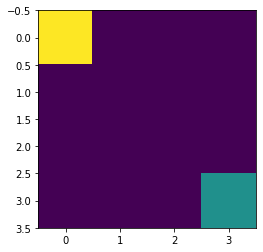

In [330]:
pos1 = [0,0] #start position of our agent
pos2 = [3,3] #goal position of our agent
grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.5

plt.imshow(grid)

In [356]:
class GridEnvironment(gym.Env):
    metadata = {'render.modes': []}

    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 10
        self.done = False
        self.timestep = 0

    def reset(self):
        self.state = np.zeros((4, 4))
        self.done = False
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1  # Initial agent position
        self.state[tuple(self.goal_pos)] = 0.5  # Goal position

        self.rocks = [(0, 3), (1, 2)]  # Rocks positions
        for rock_pos in self.rocks:
            self.state[rock_pos] = -1  # Rocks as negative rewards

        self.rewards = [(2, 1), (2, 2)]  # Rewards positions
        for reward_pos in self.rewards:
            self.state[reward_pos] = 2  # Positive rewards at reward positions

        observation = self.state.flatten()
        return observation

    def step(self, action):
        if action == 0:  # Down
            self.agent_pos[0] += 1
        elif action == 1:  # Up
            self.agent_pos[0] -= 1
        elif action == 2:  # Right
            self.agent_pos[1] += 1
        elif action == 3:  # Left
            self.agent_pos[1] -= 1

        # Comment this to demonstrate the truncation condition.
        self.agent_pos = np.clip(self.agent_pos, 0, 3)

        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5

        for rock_pos in self.rocks:
            self.state[rock_pos] = -1

        for reward_pos in self.rewards:
            self.state[reward_pos] = 2 

        observation = self.state.flatten()

        reward = 0
        if np.array_equal(self.agent_pos, self.goal_pos):
            reward = 15
            self.done = True
        elif tuple(self.agent_pos) in self.rocks:
            if tuple(self.agent_pos) == (0, 3):
                reward = -3  
            elif tuple(self.agent_pos) == (1, 2):
                reward = -2 
        elif tuple(self.agent_pos) in self.rewards:
            if tuple(self.agent_pos) == (2, 1):
                reward = 2
            elif tuple(self.agent_pos) == (2, 2):
                reward = 4 

        self.timestep += 1

        terminated = True if self.timestep >= self.max_timesteps else False

        agentState = self.agent_pos
        isDone = self.done
        timestepCount = self.timestep

        return observation, reward, terminated, agentState, isDone, timestepCount

    def render(self):
        plt.title('Grid World')

        # Visualize rocks as red color
        for rock_pos in self.rocks:
            plt.scatter(rock_pos[1], rock_pos[0], color='red', marker='s', s=300)

        # Visualize rewards as orange color
        for reward_pos in self.rewards:
            plt.scatter(reward_pos[1], reward_pos[0], color='orange', marker='P', s=300)

        # Visualize agent as green color
        plt.scatter(self.agent_pos[1], self.agent_pos[0], color='green', marker='o', s=300)

        # Visualize the goal as blue color
        plt.scatter(self.goal_pos[1], self.goal_pos[0], color='blue', marker='*', s=300)
        plt.imshow(self.state)
        plt.show()

In [357]:
actionsEquivalent = {0:'Up', 1:'Down', 2:'Right', 3:'Left'}
statesEquivalent = {(0,0):'S1', (0,1):'S2', (0,2):'S3', (0,3):'S4', (1,0):'S5', (1,1):'S6', (1,2):'S7', 
                    (1,3):'S8',(2,0):'S9',(2,1):'S10',(2,2):'S11', (2,3):'S12', (3,0):'S13', (3,1):'S14', 
                    (3,2):'S15', (3,3):'S16'}

In [358]:
# Definition an agent that takes action randomly
class RandomAgent:

  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    """Takes a step in the environment by choosing an action randomly.

    Args:
        obs: The current observation.

    Returns:
        The action to take.
    """
    return np.random.choice(self.action_space.n)

Timestep: 1

Current State: S5 = (1, 0) | Action = Up | Reward = 0 | Done = False | Terminated:False


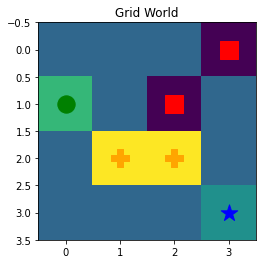

Timestep: 2

Current State: S5 = (1, 0) | Action = Left | Reward = 0 | Done = False | Terminated:False


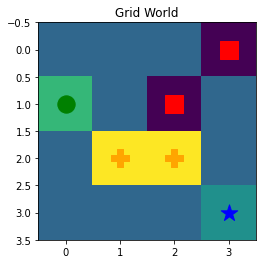

Timestep: 3

Current State: S5 = (1, 0) | Action = Left | Reward = 0 | Done = False | Terminated:False


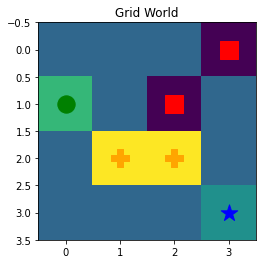

Timestep: 4

Current State: S5 = (1, 0) | Action = Left | Reward = 0 | Done = False | Terminated:False


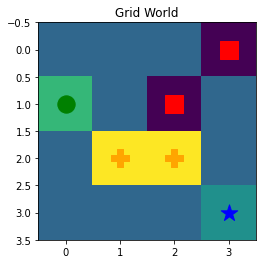

Timestep: 5

Current State: S5 = (1, 0) | Action = Left | Reward = 0 | Done = False | Terminated:False


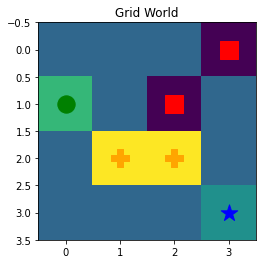

Timestep: 6

Current State: S6 = (1, 1) | Action = Right | Reward = 0 | Done = False | Terminated:False


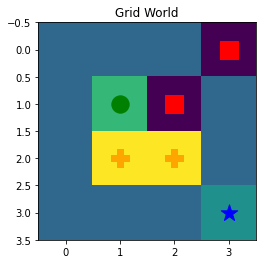

Timestep: 7

Current State: S5 = (1, 0) | Action = Left | Reward = 0 | Done = False | Terminated:False


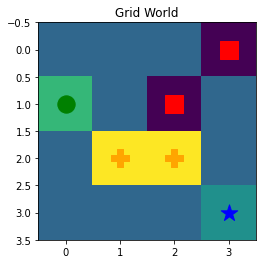

Timestep: 8

Current State: S1 = (0, 0) | Action = Down | Reward = 0 | Done = False | Terminated:False


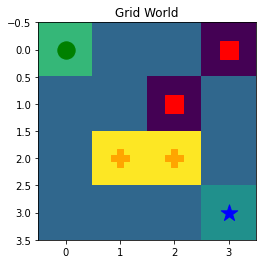

Timestep: 9

Current State: S1 = (0, 0) | Action = Left | Reward = 0 | Done = False | Terminated:False


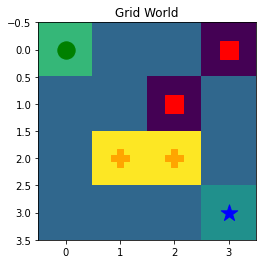

Timestep: 10

Current State: S1 = (0, 0) | Action = Down | Reward = 0 | Done = False | Terminated:True


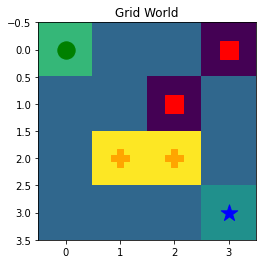

In [360]:
if __name__ == '__main__':
  env = GridEnvironment()
  agent = RandomAgent(env)

  obs = env.reset()
  terminated = False

  while not terminated:
    action = agent.step(obs)
    observation, reward, terminated, state, done, timestepCount = env.step(action)
    stateTup = tuple(state)
    print(f"Timestep: {timestepCount}")
    print(f"\nCurrent State: {statesEquivalent[stateTup]} = {stateTup} | Action = {actionsEquivalent[action]} | Reward = {reward} | Done = {done} | Terminated:{terminated}")
    env.render()

In [416]:

# SARSA algorithm for OpenAI Gym environment
def sarsa(testing=False):
    env = GridEnvironment()
    obs = env.reset()
    currentState = 0  # s1
    action_val = [0, 1, 2, 3]

    # Intialize parameters
    learningRate = 0.15  # alpha
    discount_factor = 0.95  # how much weightage to put on future rewards
    timesteps = 15
    episodes = 1000

    # Initialize Q-values
    action_space_size = env.action_space.n
    state_space_size = env.observation_space.n
    Q = np.zeros((state_space_size, action_space_size))

    # Mapping nextState co-ordinates to q_table co-ordinates
    states = {(0, 0): 0, (0, 1): 1, (0, 2): 2, (0, 3): 3,
              (1, 0): 4, (1, 1): 5, (1, 2): 6, (1, 3): 7,
              (2, 0): 8, (2, 1): 9, (2, 2): 10, (2, 3): 11,
              (3, 0): 12, (3, 1): 13, (3, 2): 14, (3, 3): 15} 
    
    #Empty lists to store values
    optimal = []
    reward_values = []
    total_timesteps = []
    epsilon_values = []
    eva_rewards = []

    done = False
    total_episodes = episodes
    eva_episodes = 10
    avg_timesteps = 0
    epsilon = 1
    decay_factor = (0.01/1)**(1/total_episodes)
    closeTarget = [(3, 2), (2, 3)]

    #For testing results
    if testing: 
        total_episodes += eva_episodes 
        print("Evaluation Results")

    # Epsilon-greedy policy
    def epsilon_greedy_policy(Q, state, epsilon):
        if np.random.random() < epsilon:
            return np.random.choice(action_val)
        else:
            return np.argmax(Q[state])

    for episode in range(1, total_episodes+1):
        env.reset()
        currentState = 0
        total_rewards = 0
        timestep = 0
        currAction = epsilon_greedy_policy(Q, currentState, epsilon)

        while timestep != timesteps:
            _, reward, _, agentState, done, _ = env.step(currAction)
            nextState = states[tuple(agentState)]
            
            if reward == 15:
                reward += 100 # when goal reached assign higher reward

            # When its about to reach the goal assign higher reward
            for agent in closeTarget:
                if (agent == agentState).all():
                    reward += 6 

            nextAction = epsilon_greedy_policy(Q, nextState, epsilon)

            # Update Q-value using SARSA update rule
            Q[currentState][currAction] = Q[currentState][currAction] + learningRate * \
                (reward + discount_factor*Q[nextState]
                 [nextAction] - Q[currentState][currAction])
            
            if episode == total_episodes:
                optimal.append(currentState+1)

            timestep += 1
            total_rewards += reward
            
            currentState = nextState
            currAction = nextAction

            if done:
                break

        #Results after each episode
        avg_timesteps += timestep #Capturing all timesteps for all 100 episodes
        total_timesteps.append(avg_timesteps)

        reward_values.append(total_rewards) #Append rewards in every episode
        epsilon_values.append(epsilon) #Append epsilon values in every episode


        if epsilon > 0.01: #keeping epsilon in [0.01 - 1] range as if it falls below 0.01 it will exploit more: choosing best actions. We want our agent to explore a bit: choosing random actions
            epsilon = epsilon*decay_factor
        else:
            epsilon = 0.01


        if (episode % 100) == 0 and testing == False: #printing results for every 100 episodes
            print("Episode: {}, Rewards: {}, Average timesteps taken: {}, epsilon: {}".format(episode, total_rewards, avg_timesteps//100, epsilon))
            avg_timesteps = 0

        #testing results
        if testing:
            if episode > total_episodes - eva_episodes:
                eva_rewards.append(reward)

    print(optimal)
        #printing the optimal path in last episode
        # if episode == total_episodes:
        #     print("Optimal Path: ")
        #     for i in optimal:
        #         print(i,"->", end = " ")
        #     print(nextState+1)

    # print("Q Table: \n", Q)

    #Plotting the results
    #x, y co-ordinates
    x = [episode for episode in range(total_episodes)]
    yr = reward_values
    ye = epsilon_values

    yr_eva = eva_rewards
    x_eva = [episode for episode in range(eva_episodes)]
    

    if testing:
        #episodes vs rewards
        plt.plot(x_eva,yr_eva)
        plt.title("Rewards per episode")
        plt.xlabel('Episodes')
        plt.ylabel('Rewards')

    else:
        #episodes vs epsilon
        #Plots showing episodes vs epsilon, episodes vs rewards
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
        ax1.plot(x, ye)
        ax1.set_title("Epsilon decay")

        #episodes vs rewards
        ax2.plot(x,yr)
        ax2.set_title("Rewards per episode")



[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
Episode: 100, Rewards: 133, Average timesteps taken: 13, epsilon: 0.6309573444801949
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
Episode: 200, Rewards: 127, Average timesteps taken: 10, epsilon: 0.39810717055349926
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

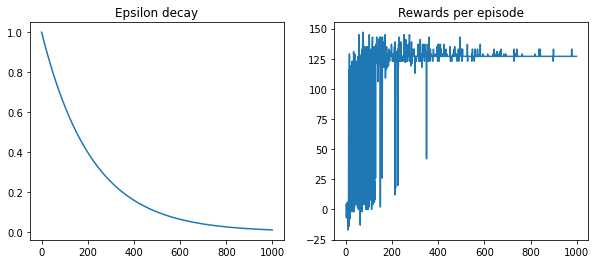

In [417]:
sarsa(testing=False)